In [153]:
%run gates.ipynb
%run states.ipynb
%run ptr.ipynb
%run jupyterQ.ipynb
%run entropy.ipynb

# Complementarity relation
For a given coherence measures $C$, it is possible to find one or more predictability measure $P$ such that
\begin{equation}
C(\rho_{A})+P(\rho_{A}) \le u(d_{A}),
\end{equation}
with $u(d_{A})$ beind a function only of the system dimension $d_{A}$. In principle, for pure states $|\psi\rangle_{AB}$, it is possible to find a quantum correlation measure $A$ that completes the above CR such that
\begin{equation}
C(\rho_{A})+P(\rho_{A})+Q(|\psi\rangle_{AB}) = u(d_{A}).
\end{equation}

## Werner-like one qubit state
We begin with a one-qubit state
\begin{equation}
\rho_{w,x} = w|\psi\rangle\langle\psi|+(1-w)\mathbb{I}_{2}/2,
\end{equation}
with $|\psi\rangle=\sqrt{x}|0\rangle+\sqrt{1-x}|1\rangle$.

In [22]:
def rho_wx(w,x):
    psi = sqrt(x)*cb(2,0) + sqrt(1-x)*cb(2,1)
    return w*proj(psi)+(1-w)*id(2)/2

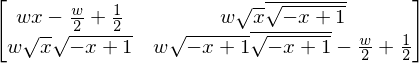

In [5]:
x,w=symbols('x w', positive=True, real=True); simplify(rho_wx(w,x))

Purification
\begin{equation}
|\psi\rangle_{AB} = (-\sqrt{1-x}|0\rangle_{A} + \sqrt{x}|1\rangle_{A})\otimes\sqrt{\frac{1-w}{2}}|0\rangle_{B}+ (\sqrt{x}|0\rangle_{A} + \sqrt{1-x}|1\rangle_{A})\otimes\sqrt{\frac{1+w}{2}}|1\rangle_{B}.
\end{equation}

In [30]:
psiAB_xw = tp((-sqrt(1-x)*cb(2,0)+sqrt(x)*cb(2,1)),(sqrt((1-w)/2)*cb(2,0))) \
        + tp((sqrt(x)*cb(2,0)+sqrt(1-x)*cb(2,1)),(sqrt((1+w)/2)*cb(2,1))) 
#simplify(psiAB_xw)

In [31]:
rhoAB_xw = proj(psiAB_xw)#; simplify(rhoAB_xw)

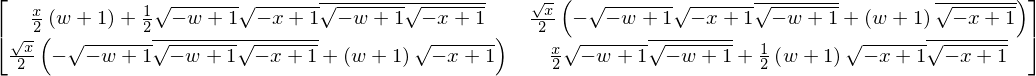

In [32]:
rhoA_xw = ptraceB(2,2,rhoAB_xw)
simplify(rhoA_xw)

# $l_{1}$-norm complementarity
\begin{equation}
C_{l_{1}}(\rho_{A})+P_{l_{1}}(\rho_{A})+Q_{l_{1}}(\rho_{A})=d_{A}-1
\end{equation}
with $\rho_{A}=Tr_{B}(|\psi\rangle_{AB}\langle\psi|$)
## $l_{1}$-norm coherence
\begin{equation}
C_{l_{1}}(\rho_{A}) = \sum_{j\ne k}|\rho^{A}_{j,j}| = 2\sum_{j<k}|\rho^{A}_{j,j}|
\end{equation}

In [6]:
def coh_l1(rho):
    d=rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C

In [35]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}')#; rho1qb(r1,r2,r3)
simplify(coh_l1(rho1qb(r1,r2,r3)))

In [45]:
simplify(coh_l1(rho_wx))

## $l_{1}$-norm predictability
\begin{equation}
P_{l_{1}}(\rho_{A}) = d-1-\sum_{j\ne k}\sqrt{\rho^{A}_{j,j}\rho^{A}_{k,k}}= d-1-2\sum_{j<k}\sqrt{\rho^{A}_{j,j}\rho_{k,k}}
\end{equation}

In [62]:
def predict_l1(rho):
    d=rho.shape[0]; P = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            P += sqrt(rho[j,j]*rho[k,k])
    return d-1-2*P

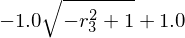

In [49]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_l1(rho1qb(r1,r2,r3)))

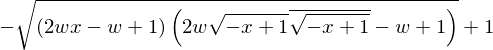

In [50]:
simplify(predict_l1(rho_wx))

## $l_{1}$-norm quantum correlation
\begin{equation}
Q_{l_{1}}(\rho_{AB}) = \sum_{j\ne k}\left(\sqrt{\rho^{A}_{jj}\rho^{A}_{kk}}-|\rho^{A}_{jk}|\right)=2\sum_{j< k}\left(\sqrt{\rho^{A}_{jj}\rho^{A}_{kk}}-|\rho^{A}_{jk}|\right),
\end{equation}
with $\rho^{A}=Tr_{B}(\rho_{AB})$

In [64]:
def qcorr_l1(rhoA):
    #rhoA = ptraceB(da, db, rhoAB)
    da = rhoA.shape[0]; qc = 0
    for j in range(0,da-1):
        for k in range(j+1,da):
            qc += sqrt(rhoA[j,j]*rhoA[k,k]) - abs(rhoA[j,k])
    return 2*qc

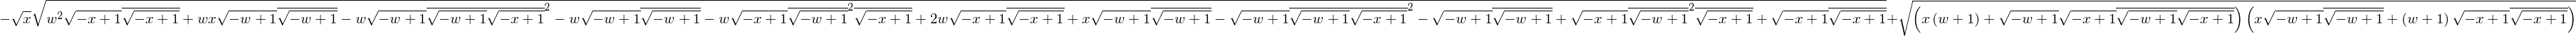

In [31]:
simplify(qcorr_l1(2,2,rhoAB_xw))

# Hilbert-Schmidt complementarity
## Hilbert-Schmidt coherence
\begin{equation}
C_{hs}(\rho) = \sum_{j\ne k}|\rho_{j,k}|^{2} = 2\sum_{j<k}|\rho_{j,k}|^{2}
\end{equation}

In [87]:
def coh_hs(rho):
    d=rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += (abs(rho[j,k]))**2
    return 2*C

In [41]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_hs(rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-linear predictability
\begin{equation}
P_{hs}(\rho) = \sum_{j}(\rho_{j,j})^{2}-1/d_{A}
\end{equation}

In [88]:
def predict_hs(rho):
    d=rho.shape[0]; P = 0
    for j in range(0,d):
        P += rho[j,j]**2
    return P-1/d

In [39]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_hs_l(rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-linear quantum correlation
\begin{equation}
Q_{hs}(\rho_{AB}) = S_{l}(\rho_{A}) = 1-Tr(\rho_{A}^{2}).
\end{equation}

In [89]:
def qcorr_hs(rhoA):
    #rhoA = ptraceB(da,db,rhoAB)
    return 1-tr(rhoA*rhoA)

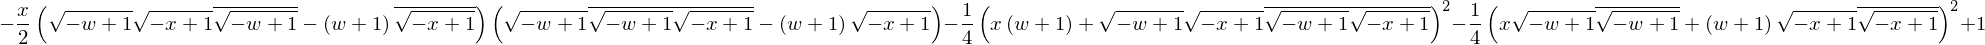

In [60]:
simplify(qcorr_hs(2,2,rhoAB_xw))

# Wigner-Yanase complementarity
## Wigner-Yanase coherence
\begin{equation}
C_{wy}(\rho) = \sum_{j\ne k}|(\sqrt{\rho})_{j,k}|^{2} = 2\sum_{j<k}|(\sqrt{\rho})_{j,k}|^{2}
\end{equation}

In [105]:
def coh_wy(rho):
    d=rho.shape[0]; rho_sqrt = mat_sqrt(d,rho)
    C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho_sqrt[j,k])**2
    return 2*C

In [68]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_wy(rho1qb(r1,r2,r3)))

## Wigner-Yanase predictability
It is the same as $P_{hs}$.

## Wigner-Yanase quantum correlation
\begin{equation}
Q_{wy}(\rho_{AB}) = \sum_{j=1}^{d_{A}}\left(\langle j|\sqrt{\rho_{A}}|j\rangle^{2} - \langle j|\rho_{A}|j\rangle^{2}\right)
\end{equation}

In [106]:
def qcorr_wy(rhoA):
    #rhoA = ptraceB(da,db,rhoAB); 
    da = rhoA.shape[0]; rhoA_sqrt = mat_sqrt(da,rhoA); qc=0
    for j in range(0,da):
        qc += (rhoA_sqrt[j,j]**2 - rhoA[j,j]**2)
    return qc

In [63]:
#simplify(qcorr_wy(2,2,rhoAB_xw))

# Relative entropy complementarity
\begin{equation}
C_{re}(\rho_{A})+P_{re}(\rho_{A})+Q_{re}(|\psi\rangle_{AB}) = \log_{2}(d_{A})
\end{equation}
with $\rho_{A}=Tr_{B}(|\psi\rangle_{AB}\langle\psi|)$
## Relative entropy coherence
\begin{equation}
C_{re}(\rho_{A}) = S(\rho^{A}_{diag})-S(\rho_{A}),
\end{equation}
with $\rho^{A}_{diag}=diag(\rho^{A}_{1,1},\rho^{A}_{2,2},\cdots,\rho^{A}_{d,d})$.

In [164]:
def coh_re(rhoA):
    da = rhoA.shape[0]; pv = zeros(da,1)
    for j in range(0,da):
        pv[j] = rho[j,j]
    return shannon(pv) - von_neumann(rhoA)

In [166]:
#coh_re(rho1qb(0,0,0.99))

## Relative entropy predictability
\begin{equation}
P_{re}(\rho) = \log_{2}(d)+\sum_{j=1}^{d}\rho_{jj}\log_{2}(\rho_{jj})
\end{equation}

In [167]:
def predict_re(rho):
    d=rho.shape[0]; P = 0
    for j in range(0,d):
        P += abs(rho[j,j])*log(abs(rho[j,j]),2)
    return log(d,2)+P

In [168]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_re(rho1qb(r1,r2,r3)))

## Relative entropy quantum correlation
\begin{equation}
Q_{re}(|\psi\rangle_{AB}) = S_{vn}(\rho_{A})
\end{equation}

In [169]:
def qcorr_re(rhoA):
    return von_neumann(rhoA)

# IBMQE tests

In [148]:
x = np.zeros(11); C = np.zeros(11); P = np.zeros(11); Q = np.zeros(11); ICR = np.zeros(11); CCR = np.zeros(11)
path0 = '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/werner_data/rodada_1/'
for j in range(0,11):
    path1 = path0 + str(j) + '/psi_qc/'
    for k in range(0,11):
        path2 = path1 + str(k) + '.npy'#; print(path2)
        psi = np.load(path2,'r')#; print(psi)
        rho = ptraceB(2, 2, proj(psi))#; print(rho)
        if j == 0:
            #print(rho)
            x[k] = k; C[k] = coh_l1(rho)#; print(C[k])
#plt.plot(x,C); plt.show()

## Werner-like states: Theoretical

In [170]:
N = 22; de = 1/(N-1); w = np.zeros(N*N); x = np.zeros(N*N); C = np.zeros(N*N); P = np.zeros(N*N); Q = np.zeros(N*N)
for j in range(0,N):
    for k in range(0,N):
        w[j+N*k] = j*de; x[j+N*k] = k*de; rho = rho_wx(w[j+N*k],x[j+N*k])
        #C[j+N*k] = coh_l1(rho); P[j+N*k] = predict_l1(rho); Q[j+N*k] = qcorr_l1(rho) # l1-norm
        #C[j+N*k] = coh_hs(rho); P[j+N*k] = predict_hs(rho); Q[j+N*k] = qcorr_hs(rho) # hilbert-schmidt
        #C[j+N*k] = coh_wy(rho); P[j+N*k] = predict_hs(rho); Q[j+N*k] = qcorr_wy(rho) # wigner-yanase
        C[j+N*k] = coh_re(rho); P[j+N*k] = predict_re(rho); Q[j+N*k] = qcorr_re(rho) # relative entropy
        #print('w={0:1.2f}'.format(w[j+N*k]),', x={0:1.2f}'.format(x[j+N*k]),', C={0:1.2f}'.format(C[j+N*k]),', P={0:1.2f}'.format(P[j+N*k]),', Q={0:1.2f}'.format(Q[j+N*k]))

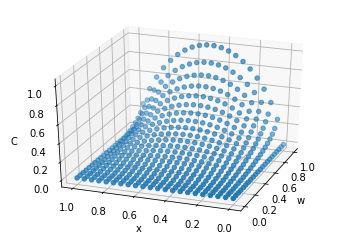

In [171]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('C')
ax.scatter3D(w,x,C); ax.view_init(30,200)

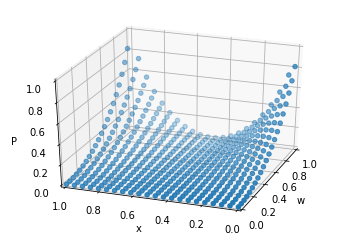

In [172]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('P')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1); ax.scatter3D(w,x,P); ax.view_init(30,200)

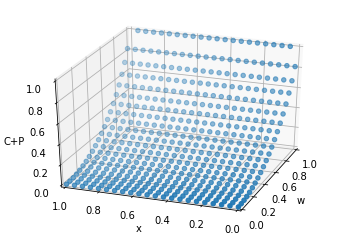

In [173]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('C+P')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1); ax.scatter3D(w,x,C+P); ax.view_init(30,200)

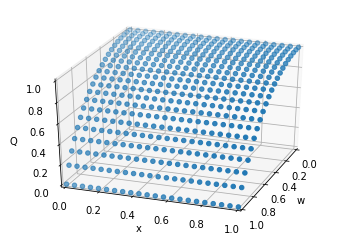

In [174]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('Q')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1); ax.scatter3D(w,x,Q); ax.view_init(30,20)

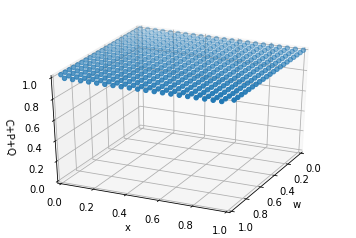

In [179]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('C+P+Q')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1); ax.scatter3D(w,x,C+P+Q); ax.view_init(30,25)